# **Project 2** 
*Visualization Replication Part*

### **Team Members**
Team id: T6 

|      Name     |   Student ID   |
|:-------------:|:--------------:|
|   Yifei Cui   |  320210941260  |  
|   Sichen Lin  |　320210941600  |
|   Shuhao Li   |  320210941501  |
|   Xuran Zhu　 |  320210941441  | 

Date: 2023-12-20

### **Abstract**

This code file firstly implements the replication of a visualization about the 'Comparative statistics on tourism between China and New Zealand before and after COVID-19'. Since the original publicly available graph has some shortcomings, such as too complex visualization, missing of plots' titles, using double y-axis ... We make targeted changes like separating the graph, erasing redundant data-ink, adding annotation and explanation ... to this graph to make it more aesthetically pleasing, more readable, and less misleading. 

### **1. Function definition**

To reduce redundancy and improve cohesion, we encapsulate the code for implementing the reproduction and optimisation of the visualization. This section will focus on defining all the functions needed.

#### **1.1. Stacked bar chart visualization**

The following code defines a function named *"plot_stacked_bar_chart"* that creates a stacked bar chart using the Matplotlib library. 

The function takes in various parameters to customize the chart's appearance and data used. It is flexible and customizable, allowing for various adjustments to meet different data visualization needs.  

In [1]:
# Import the required packages
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np    
from matplotlib.ticker import PercentFormatter  

# Set up the font used in the chart 
mpl.rcParams['font.family'] = 'Arial' 
# Set up clearer graph format
%config InlineBackend.figure_format='png'

In [2]:
def plot_stacked_bar_chart(ax, x, y1, y2, label_size=20, separate=False, add_data=False, label_list=None, rotation_value=45, bbox_place=(0.85, -0.12)):  
    """  
    Plot a stacked bar chart.  
  
    Parameters:  
        - ax: Matplotlib axes object to plot the chart on.  
        - x: Numpy array of x-coordinates for the line chart. 
        - y1: Numpy array of heights for the first set of bars, i.e. number of Chinese tourists to New Zealand.   
        - y2: Numpy array of heights for the second set of bars, i.e. number of New Zealand tourists to China.    
        - label_size: Font size for labels (default is 20). 
        - separate: If True, bars for different sets are separated; otherwise, they are stacked (default is False).
        - add_data: If True, display data labels on top of the bars (default is False).
        - label_list: List of y-axis tick positions.
        - rotation_value: Rotation angle for x-axis tick labels (default is 45).
        - bbox_place: Tuple specifying the position of the legend (default is (0.85, -0.12)).
  
    Return:  
        - None. The chart is plotted on the provided axes object.  
    """    

    if not separate:
        # Plot the first set of bars  
        bar1 = ax.bar(x, y1, color='#b02418', width=1.2, label='China residents visiting NZ')      
        # Plot the second set of bars on top of the first set  
        bar2 = ax.bar(x, y2, color='black', width=1.2, label='NZ residents visiting China', bottom=y1)    
    else:
        bar1 = ax.bar(x-0.5, y1, color='#b02418', width=1, label='China residents visiting NZ')      
        # Plot the second set of bars on top of the first set  
        bar2 = ax.bar(x+0.5, y2, color='black', width=1, label='NZ residents visiting China')    
        if add_data:
            for i, j in zip(bar1, y1):  
                ax.text(i.get_x() + i.get_width() / 2 , j , str(j), ha='center', va='bottom', fontsize=15)   # Increase font size for better visibility
            for i, j in zip(bar2, y2):  
                ax.text(i.get_x() + i.get_width() / 2 , j , str(j), ha='center', va='bottom', fontsize=15)   # Increase font size for better visibility
            # Set y-axis invisible
            ax.yaxis.set_visible(False)
      
    # Customize ticks and tick labels       
    ax.tick_params(which='major', labelsize=label_size, bottom=False, top=False, left=False, right=False, labelcolor='#595959')      

    # Set y-axis ticks and x-axis tick labels with rotation  
    ax.set_yticks(label_list)    
    ax.set_xticks(x)      
    ax.set_xticklabels(["May-22", "Jun-22", "Jul-22", "Aug-22", "Sep-22", "Oct-22", "Nov-22", "Dec-22", "Jan-23", "Feb-23", "Mar-23", "Apr-23"], rotation=rotation_value, color='#595959')

    # Hide the top and right spines of the chart  
    ax.spines['top'].set_visible(False)      
    ax.spines['right'].set_visible(False)      
    ax.spines['left'].set_visible(False)

    # Set the axis color
    ax.spines['bottom'].set_color('#acacab')

    # Add legend to the chart  
    ax.legend(bbox_to_anchor=bbox_place, ncol=3, frameon=False, fontsize=20, labelcolor='#595959')

#### **1.2. Line chart visualization**

The given code defines a function named *"plot_line_chart"* that is used to plot a line chart with customizable features. 

The function takes several arguments to customize the figure's appearance and data used. Its flexibility greatly facilitates the modification of the image.

In [3]:
def plot_line_chart(ax, x, line_data, scatter=False, rotation_value=45, label_size=20, bbox_place=(1.15, -0.12), left_spines=None):  
    """
    Plot a line chart.

    Parameters: 
        - ax: Matplotlib axes object to plot the chart on.
        - x: Numpy array of x-coordinates for the line chart.
        - line_data: Numpy array of y-coordinates for the line chart.
        - scatter: If True, display scatter points on the line (default is False).
        - rotation_value: Rotation angle for x-axis tick labels (default is 45).
        - label_size: Font size for labels (default is 20).
        - bbox_place: Tuple specifying the position of the legend (default is (1.15, -0.12)).
        - left_spines: If True, display left spine; otherwise, hide it (default is None).

    Return:  
        - None. The chart is plotted on the provided axes object.  
    """

    # Plot the line chart on the given axes object 'ax'  
    ax.plot(x, line_data, color='#c76934', linewidth=3, label='Recovery %')  
    # Add legend to the chart with specified properties  
    ax.legend(bbox_to_anchor=bbox_place, ncol=3, frameon=False, fontsize=20, labelcolor='#595959')  

    if scatter:
        # Add points to the line
        ax.scatter(x, line_data, color='#c76934', marker='o', s=50)
        for i, (xi, yi) in enumerate(zip(x, line_data)):
            if i < len(x) - 1:  # Exclude the last point
                ax.annotate(f'{yi:.0%}', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=15) 
    
    # Set the tick parameters for y-axis with color black and label size   
    ax.tick_params(which='major', labelsize=label_size, bottom=False, top=False, left=False, right=False, labelcolor='#595959')  
      
    # Set the ticks  
    ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])  
    ax.set_xticks(x)      
    ax.set_xticklabels(["May-22", "Jun-22", "Jul-22", "Aug-22", "Sep-22", "Oct-22", "Nov-22", "Dec-22", "Jan-23", "Feb-23", "Mar-23", "Apr-23"], rotation=rotation_value, color='#595959')   
    
    # Set the major formatter for y-axis ticks to display percentage values  
    ax.yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))  
      
    # Hide the top and right spines of the chart  
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False)  
    ax.spines['left'].set_visible(False)

    # Set the axis color
    ax.spines['bottom'].set_color('#acacab')
    ax.spines['left'].set_color('#acacab')

    # Show the left spines of the chart
    if left_spines:
        ax.spines['left'].set_visible(True) 
    
    # Get the last x and y values from the data provided  
    last_x = x[-1]  
    last_y = line_data[-1]  
    
    # Annotate the last y value as percentage on the chart  
    ax.annotate(f'{last_y:.0%}', (last_x, last_y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=20, fontweight='bold', color='#595959')  

#### **1.3. stacked percentage chart visualization**

The following code defines a function named *"plot_stacked_percentage_chart"* that is used to plot a stacked percentage chart with customizable features. 

The first function  finds the percentage for each data point in every category. Then the second function takes several parameters including the percentage values got from the former function to customize the appearance and data used of the percentage stacked bar chart.

In [4]:
# Calculate the sum of n elements in the given data
def sum_of_n_elements(data, n):
    """
    Calculate the sum of n elements in the given data.

    Parameters:
        - data: List of lists representing the data.
        - n: Number of elements to sum.

    Returns:
        - List containing the sum of n elements in the given data.
    """
    result = [0] * len(data[0])
    for i in range(n):
        for j in range(len(data[i])):
            result[j] += data[i][j]

    return result


# Function to plot a stacked percentage chart
def plot_stacked_percentage_chart(ax, categories, data, colors, show=None, labels=['Biz', 'Education', 'Holiday', 'VFR', 'Others']):
    """
    Plot a stacked percentage chart.

    Parameters:
        - ax: Matplotlib axes object to plot the chart on.
        - categories: List of category labels.
        - data: List of lists representing the data.
        - colors: List of colors for each category.
        - show: If True, all values are displayed on the chart; otherwise, only the percentages for the third and fourth regions are displayed.
        - labels: The labels in the legend used for the charts. 

    Return:  
        - None. The chart is plotted on the provided axes object.      
    """
    
    bar_list = []
    total = [sum(d) for d in zip(*data)]
    percent_data = []

    # Calculate percentage data for each category
    for x in data:
        percent_data.append([d / t * 3 for d, t in zip(x, total)])

    # Plot each category as a horizontal bar stacked on top of each other
    for y, color, i in zip(percent_data, colors, range(len(percent_data))):
        bar = ax.barh(categories, y, color=color, edgecolor='none', height=0.65, left=sum_of_n_elements(percent_data, i))
        bar_list.append(bar)
        if show:
            # Add numerical value label to each segment of the bar
            for idx, (bar_segment, value) in enumerate(zip(bar, y)):
                value = int(value * 100 / 3)
                # Highlight the text for the third and fourth categories
                if i == 2 or i == 3:
                    ax.text(bar_segment.get_x() + bar_segment.get_width() / 2,
                            bar_segment.get_y() + bar_segment.get_height() / 2,
                            f'{value}%', ha='center', va='center', fontsize=20, color='black', fontweight='bold')
                else:
                    ax.text(bar_segment.get_x() + bar_segment.get_width() / 2,
                            bar_segment.get_y() + bar_segment.get_height() / 2,
                            f'{value}%', ha='center', va='center', fontsize=20, color='white')
        else:
            # Add percentage label to each segment of the bar
            if i == 2 or i == 3:
                text_color = '#595959' if i == 2 else 'white'
                for idx, j in zip(bar, y):
                    j = int(j * 100 / 3)
                    ax.text(idx.get_x() + idx.get_width() / 2, idx.get_y() + idx.get_height() / 2,
                            f'{j}%', ha='center', va='center', fontsize=20, color=text_color, fontweight='bold')

    # Set title for the plot
    ax.set_title('Travel purpose Feb-Apr 23', fontsize=25, weight='bold', y=1.15, x=0.4, color='#595959')
    plt.subplots_adjust(bottom=0.1)
    ax.set_yticklabels([])

    # Remove unnecessary spines and axis
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.spines['left'].set_color('#acacab')
    ax.tick_params(which='major', bottom=False, top=False, left=False, right=False, labelcolor='#595959')  

    ax.legend(bar_list, labels, loc='lower center', bbox_to_anchor=(0.4, -0.35), ncol=5, frameon=False,
              fontsize=20, handlelength=0.7, columnspacing=0.5, handletextpad=0.2, labelcolor='#595959')

    # Add labels for the two groups of categories (NZ > CN and CN > NZ)
    ax.text(-0.35, 1, 'NZ>CN', ha='center', va='center', fontsize=20, color='#595959')
    ax.text(-0.35, 0, 'CN>NZ', ha='center', va='center', fontsize=20, color='#595959')

### **2. Visualization Replication**

The news article gives the source of the data while displaying the visualization.

> *Source: Auckland Airport, Stats NZ.*  

We obtained the real data used in the original visualization by visiting the official website. However, the raw data is provided as pdf files, not in an import-friendly format such as csv files. So, following we will initialize the required data one by one and then call the functions to reproduce the visualization.

In [5]:
# Define data for the first set of bars, i.e. number of Chinese tourists to New Zealand  
y1 = np.array([993, 1123, 1689, 1651, 2397, 2691, 3090, 4937, 5072, 3946, 6902, 11258])    
x = np.arange(len(y1)) * 2.5      

# Define data for the second set of bars, i.e. number of New Zealand tourists to China  
y2 = np.array([316, 384, 478, 581, 725, 1035, 1077, 1244, 2176, 4495, 3307, 6927])    
  
# Define data for the line chart  
line_data = np.array([3, 5, 4.8, 6, 7.5, 8.5, 8.4, 14, 12, 13, 21, 38]) / 100   

# Define data for the stacked percentage chart  
category_data = ['Category 1', 'Category 2']  
percentage_data = [[6, 9], [7, 8], [44, 12], [29, 55], [14, 16]]  
color_list = ['#181c89', '#426386', '#9ac6e5', '#c76934', '#d6e7f7']  

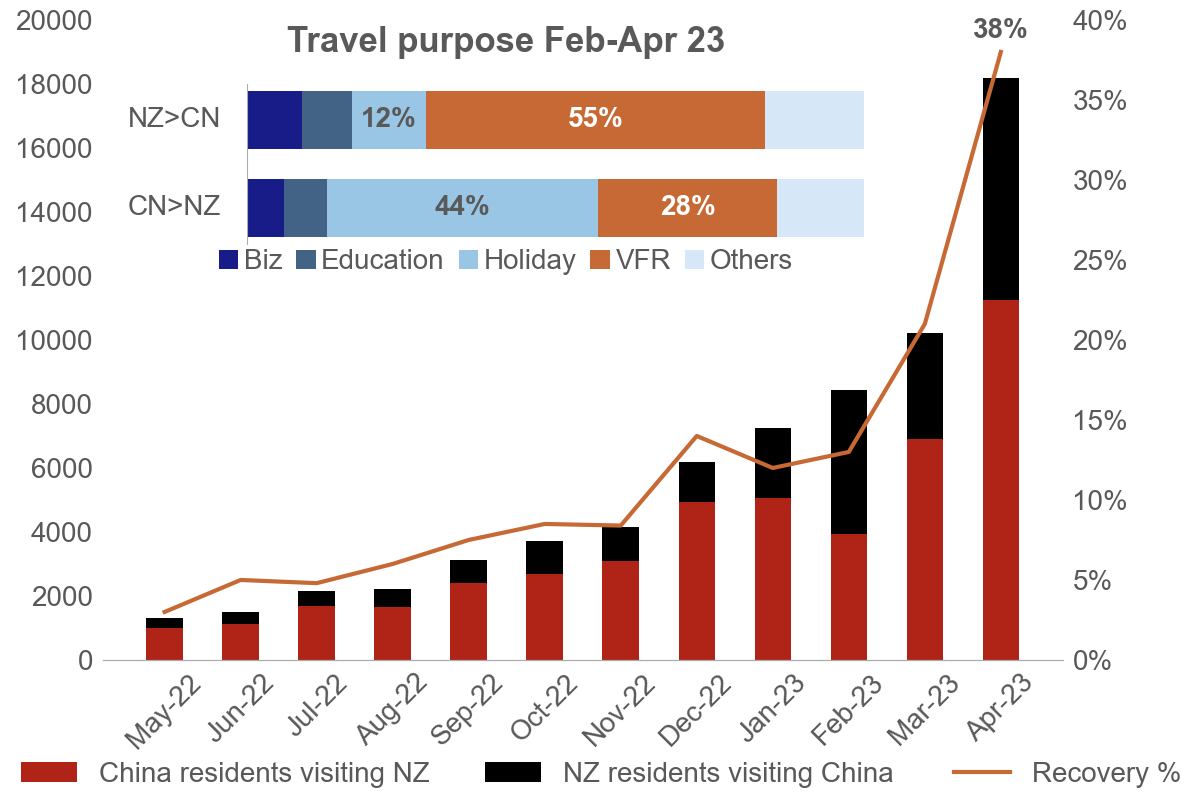

In [6]:
# Create a figure with specified size  
fig = plt.figure(figsize=(12, 8))    
  
# Add an axes to the figure for the stacked bar chart  
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])   
# Create another axes that shares the x-axis with ax1 for the line chart  
ax2 = ax1.twinx()  
# Add another axes to the figure for the stacked percentage chart  
ax3 = fig.add_axes([0.22, 0.62, 0.54, 0.2])   

# Plot the stacked bar chart using ax1  
plot_stacked_bar_chart(ax1, x, y1, y2, label_list=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000])    
# Plot the line chart using ax2  
plot_line_chart(ax2, x, line_data)  
# Plot the stacked percentage chart using ax3  
plot_stacked_percentage_chart(ax3, category_data, percentage_data, color_list)  
  
# Display all charts in the figure  
plt.show()

### **3. Improvements Realisation**

#### **3.1. Step1: Separate the original graph.**
Problem 1. Too complex visualization.  

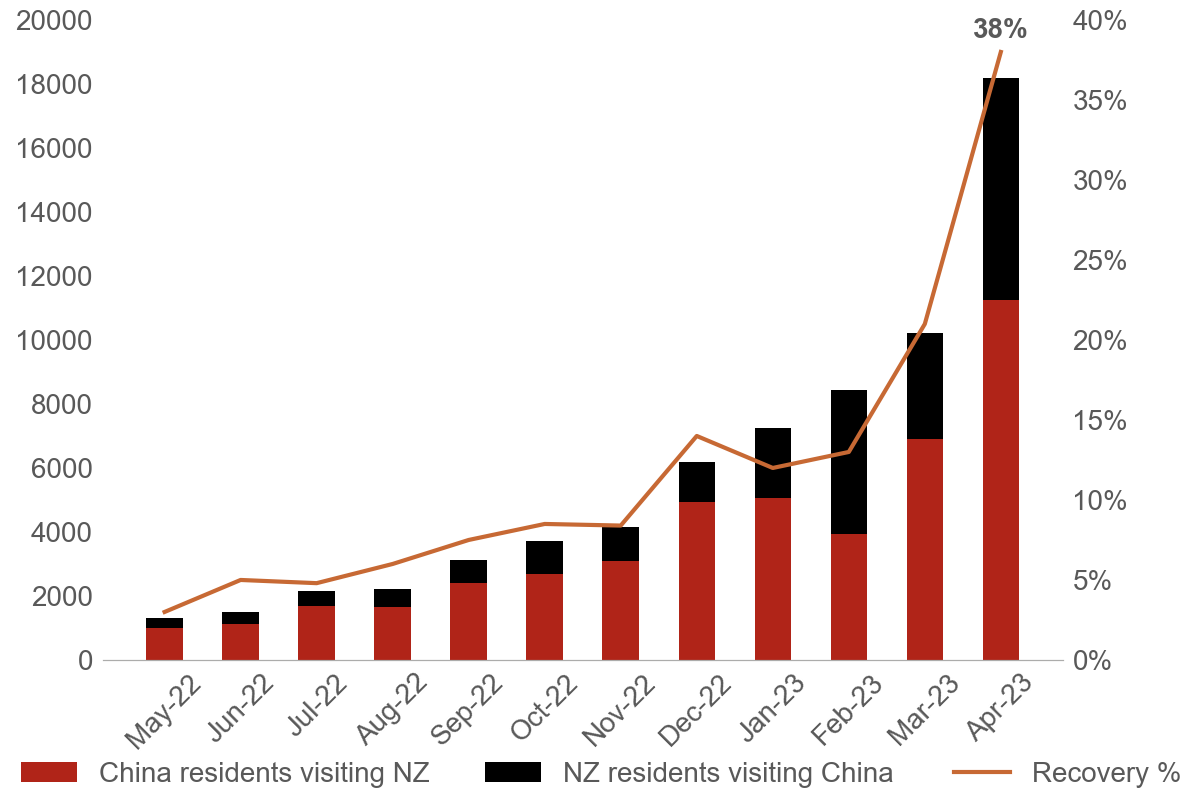

In [7]:
# Draw the stacked bar and line chart 
# Create a figure with specified size  
fig = plt.figure(figsize=(12, 8))   
# Add an axes to the figure for the stacked bar chart  
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])   
# Create another axes that shares the x-axis with ax1 for the line chart  
ax2 = ax1.twinx()  

# Plot the stacked bar chart using ax1  
plot_stacked_bar_chart(ax1, x, y1, y2,label_list=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000])    
# Plot the line chart using ax2  
plot_line_chart(ax2, x, line_data)

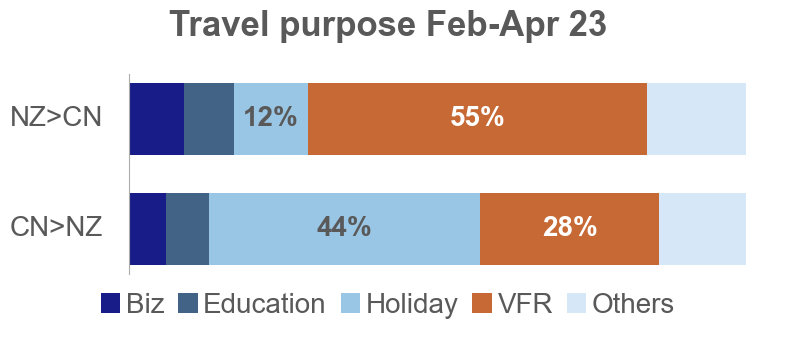

In [8]:
# Draw the percentage stacked bar chart (Row) 
# Create a figure with specified size  
fig = plt.figure(figsize=(12, 8))    
# Add an ax to the figure for the percentage stacked bar chart  
ax = fig.add_axes([0.22, 0.62, 0.54, 0.25])        

# Plot the percentage stacked bar chart using ax 
plot_stacked_percentage_chart(ax, category_data, percentage_data, color_list)

#### **3.2. Step2: Separate the graph again.**
Problem 2. Use double y-axis.  

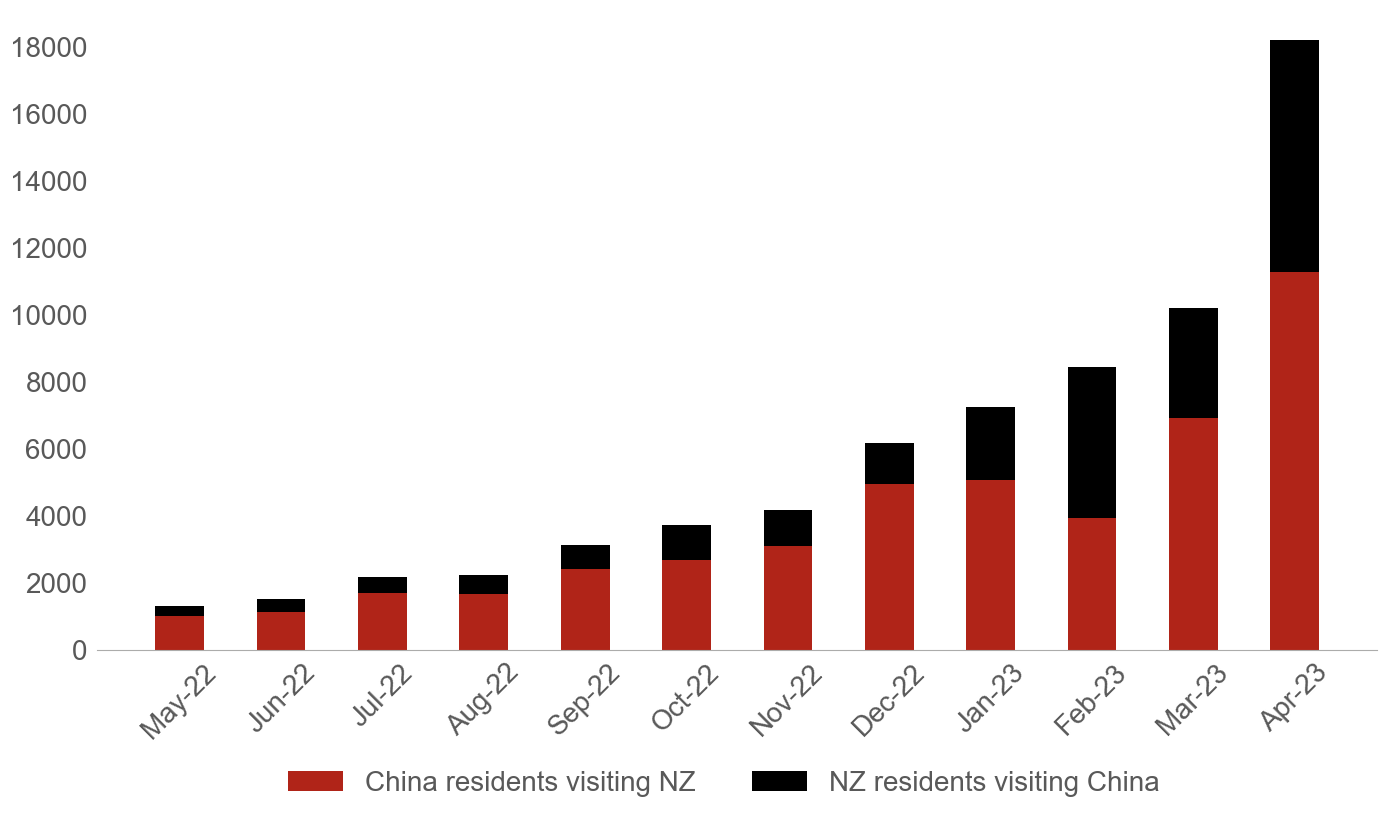

In [9]:
# Draw the stacked bar chart
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8)) 
# Add an axes to the figure for the stacked bar chart  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])   
 
# Plot the stacked bar chart using ax  
plot_stacked_bar_chart(ax, x, y1, y2,label_list=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000], bbox_place=(0.85, -0.15))    

plt.show()

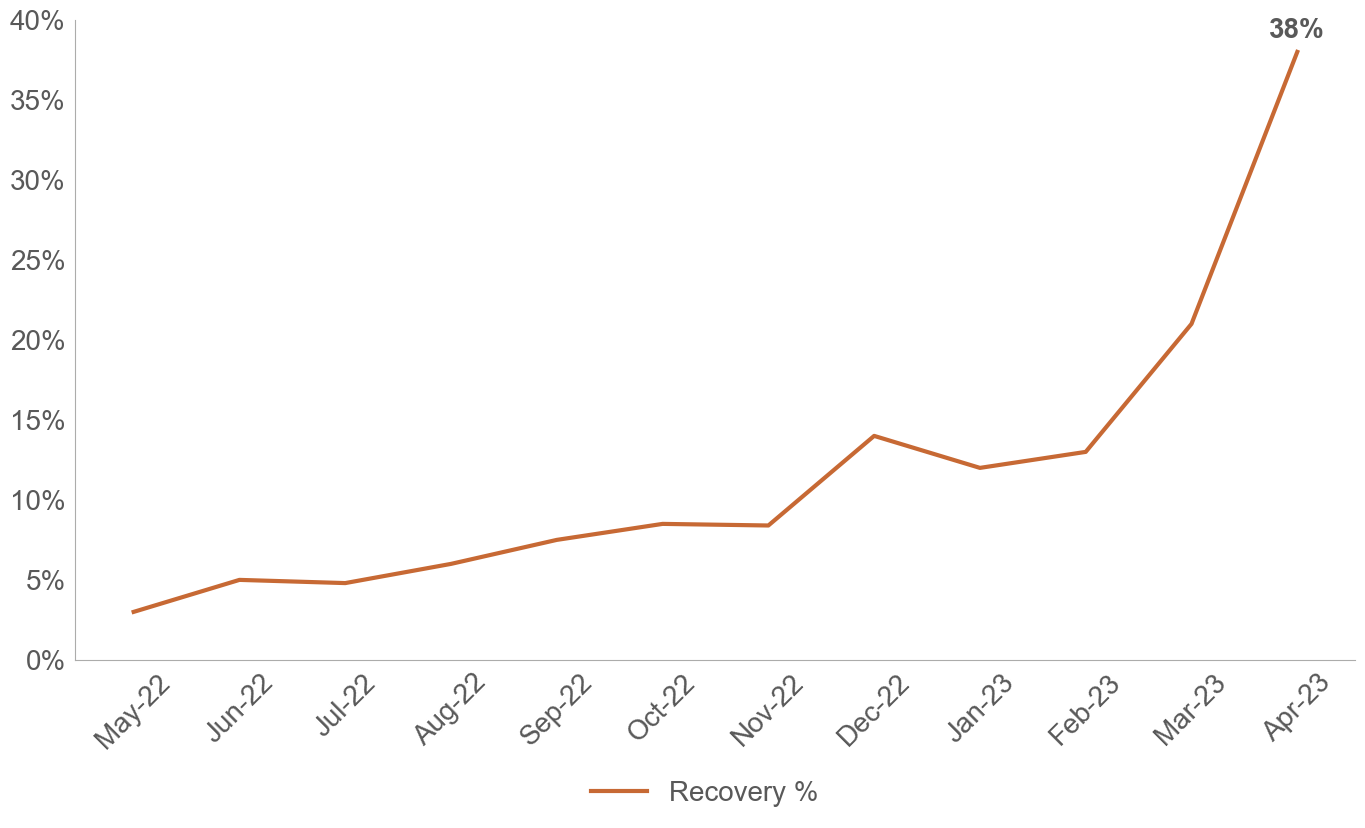

In [10]:
# Draw the line chart
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8)) 
# Add an axes to the figure for the line chart  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])   

# Plot the line chart using ax 
plot_line_chart(ax, x, line_data, bbox_place=(0.6, -0.15), left_spines=True)

plt.show()

#### **3.3. Step3: Add a clear, self-explanatory title.**
Problem 3. Missing graph title. 

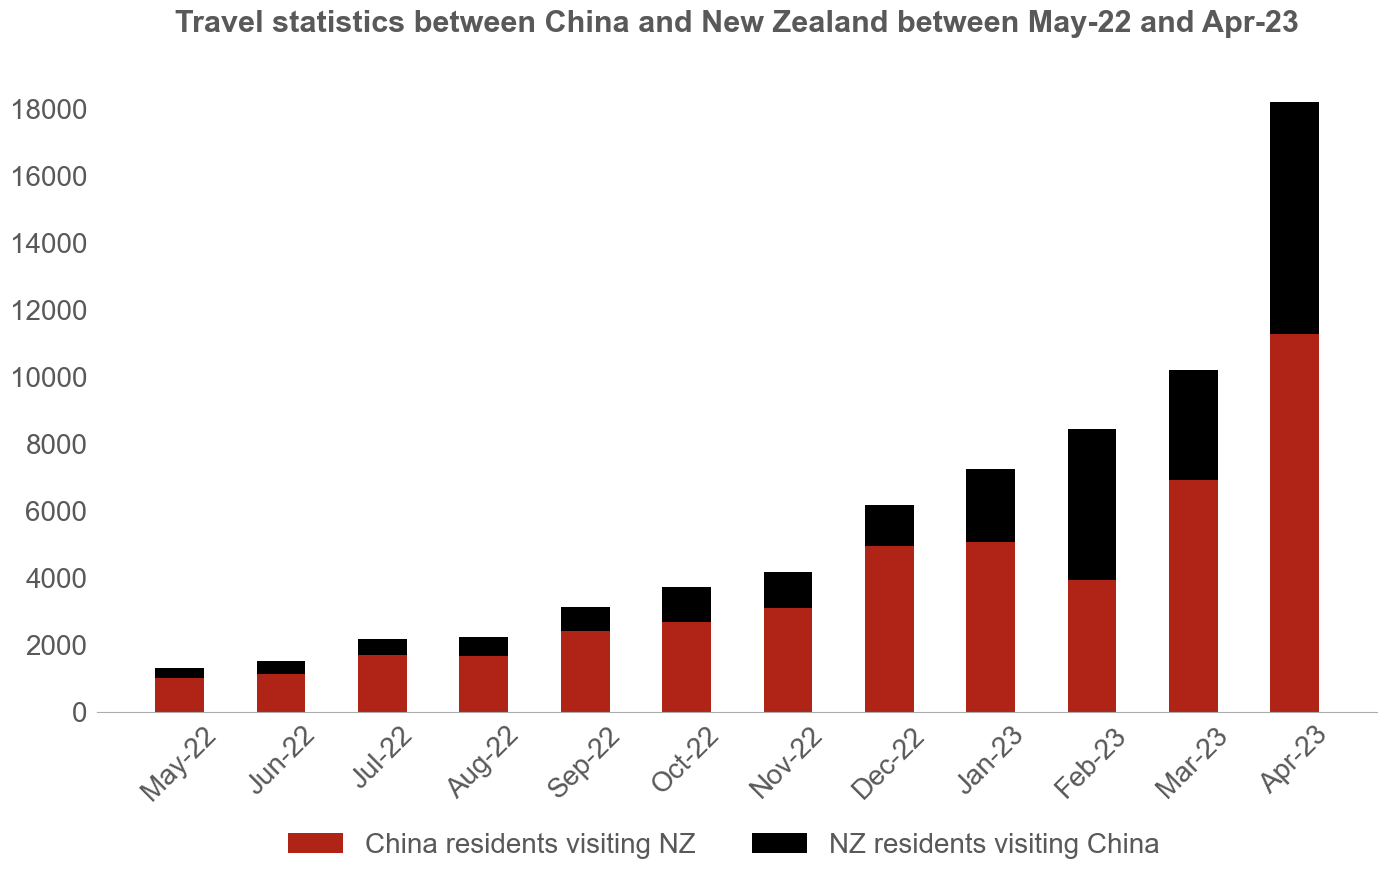

In [11]:
# Draw the stacked bar chart
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8)) 
# Add an axes to the figure for the stacked bar chart  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])   
# Set title for the plot  
ax.set_title('Travel statistics between China and New Zealand between May-22 and Apr-23', fontsize=22, color='#595959', weight='bold', y=1.05)

# Plot the stacked bar chart using ax 
plot_stacked_bar_chart(ax, x, y1, y2,label_list=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000], bbox_place=(0.85, -0.15))    

plt.show()

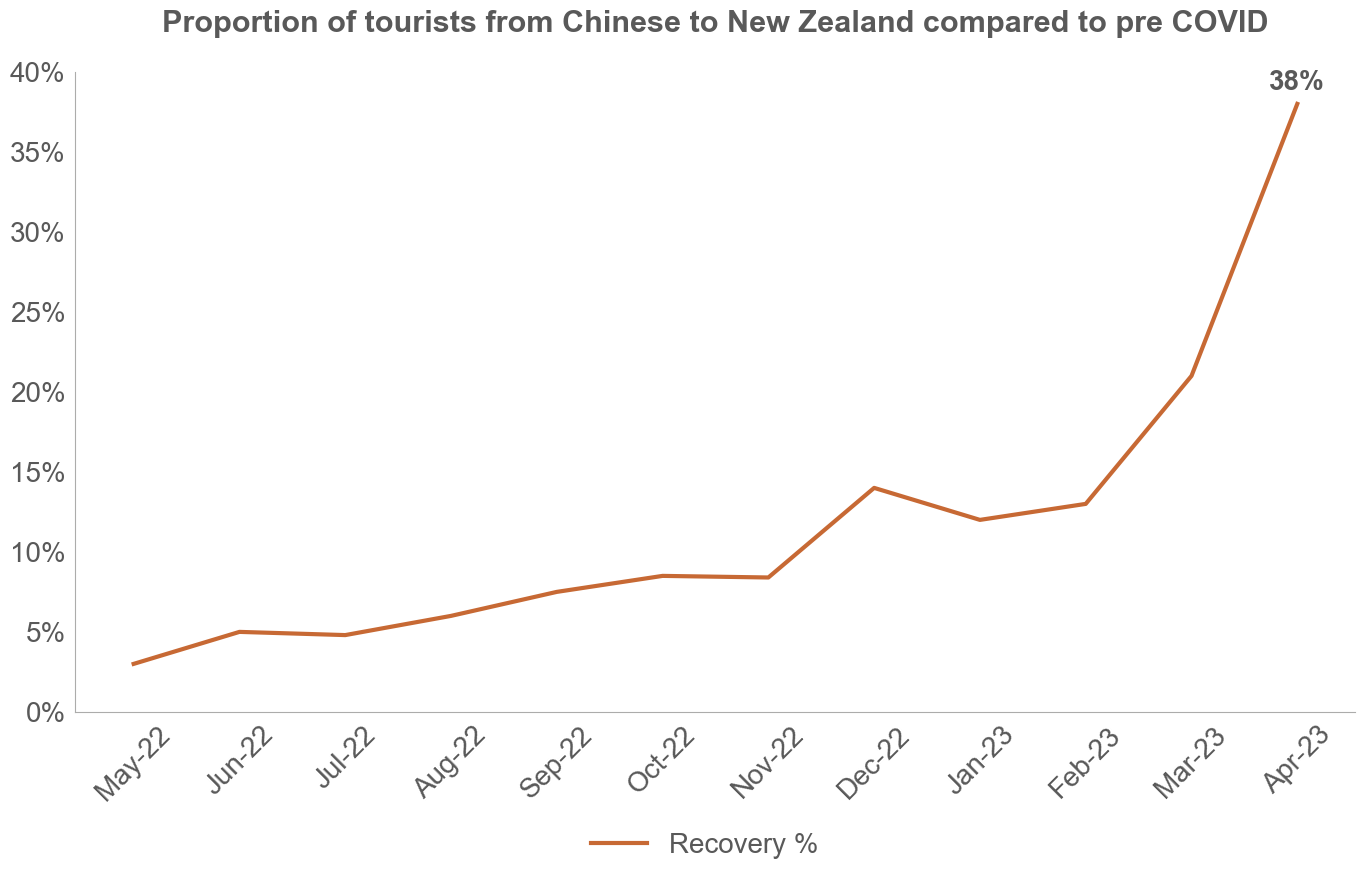

In [12]:
# Draw the line chart
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8)) 
# Add an axes to the figure for the line chart  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])   
# Set title for the plot  
ax.set_title('Proportion of tourists from Chinese to New Zealand compared to pre COVID', fontsize=22, color='#595959', weight='bold', y=1.05)

# Plot the line chart using ax 
plot_line_chart(ax, x, line_data, bbox_place=(0.6, -0.15), left_spines=True)

plt.show()

#### **3.4. Step4: Label all axes carefully.**
Problem 4. Lack of axis titles. 

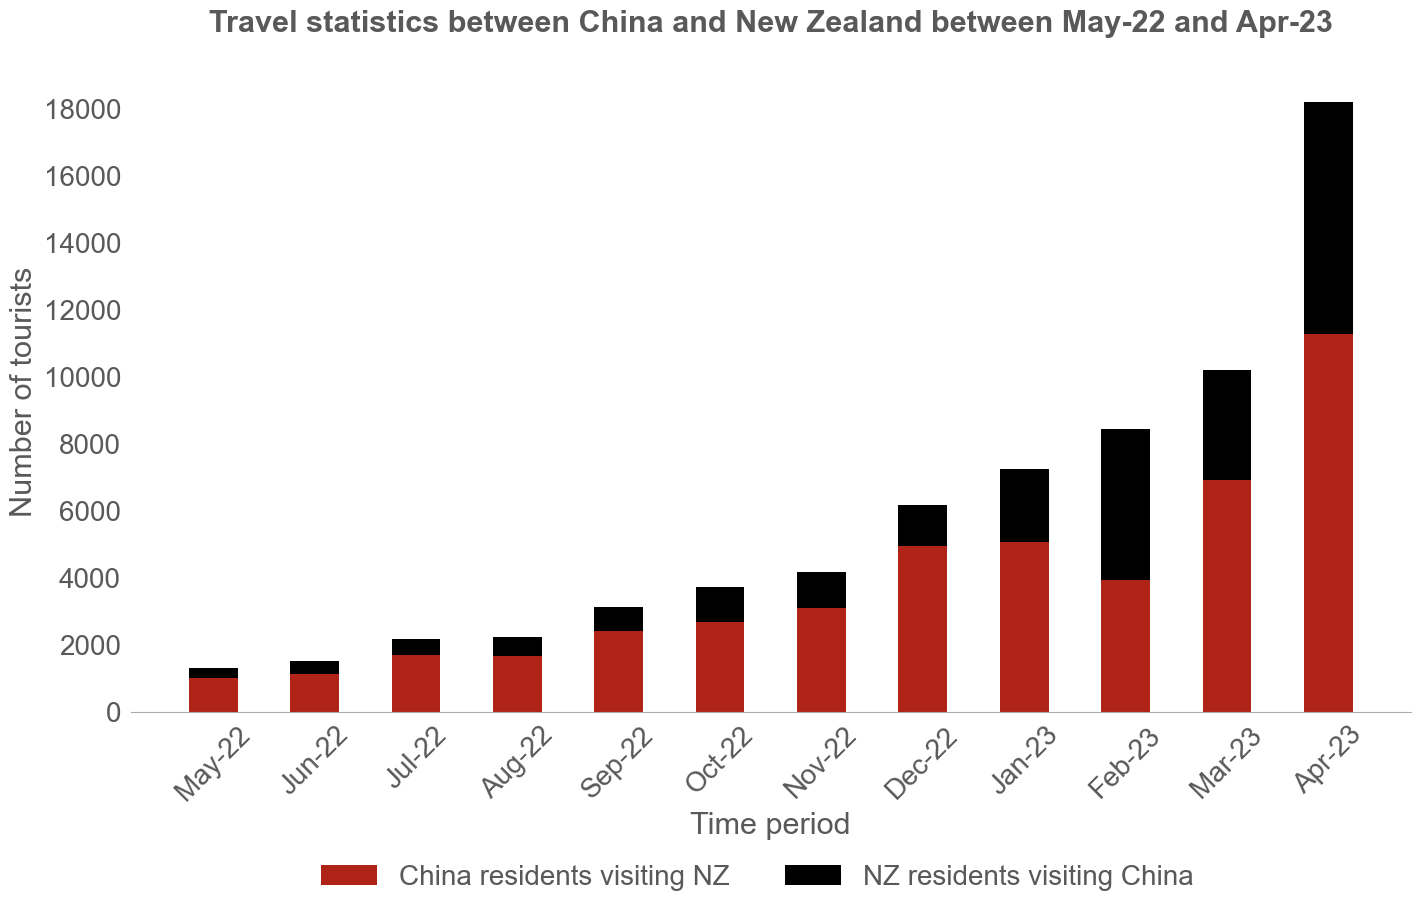

In [13]:
# Draw the stacked bar chart
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8)) 
# Add an axes to the figure for the stacked bar chart  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])   
# Set title for the plot  
ax.set_title('Travel statistics between China and New Zealand between May-22 and Apr-23', fontsize=22, color='#595959', weight='bold', y=1.05)
# Set title for axes
ax.set_xlabel('Time period', size=22, color='#595959') 
ax.set_ylabel('Number of tourists', size=22, color='#595959') 

# Plot the stacked bar chart using ax 
plot_stacked_bar_chart(ax, x, y1, y2, label_list=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000], bbox_place=(0.85, -0.2))    

plt.show()

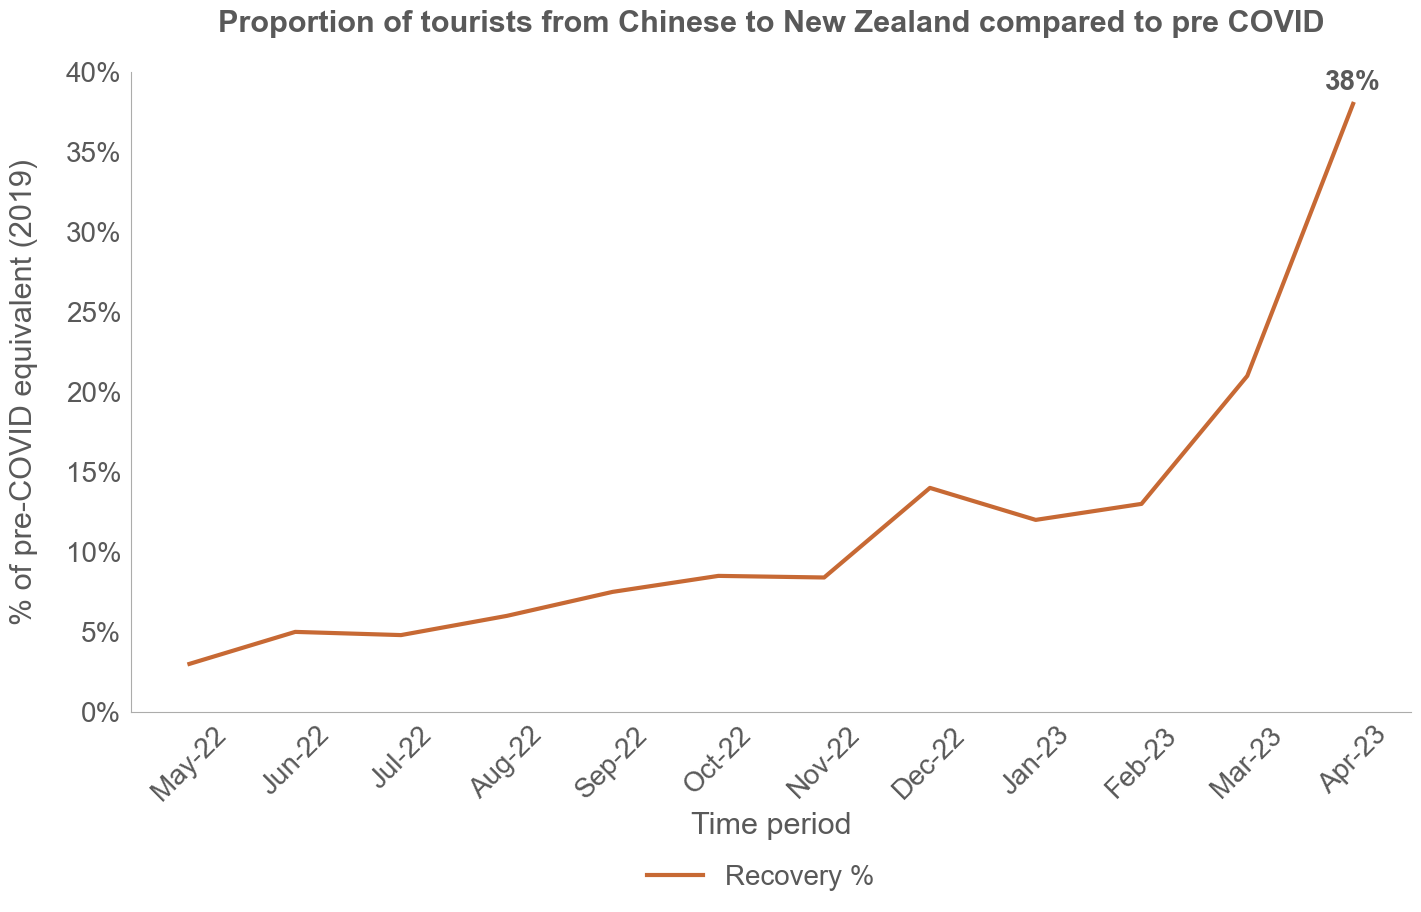

In [14]:
# Draw the line chart
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8)) 
# Add an axes to the figure for the line chart  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])   
# Set title for the plot  
ax.set_title('Proportion of tourists from Chinese to New Zealand compared to pre COVID', fontsize=22, color='#595959', weight='bold', y=1.05)
# Set title for axes
ax.set_xlabel('Time period', size=22, color='#595959') 
ax.set_ylabel('% of pre-COVID equivalent (2019)', size=22, color='#595959', labelpad=20)

# Plot the line chart using ax
plot_line_chart(ax, x, line_data, bbox_place=(0.6, -0.2), left_spines=True)

plt.show()

#### **3.5. Step 5: Replace with a grouped bar chart.**
Problem 5: Designed variation.  

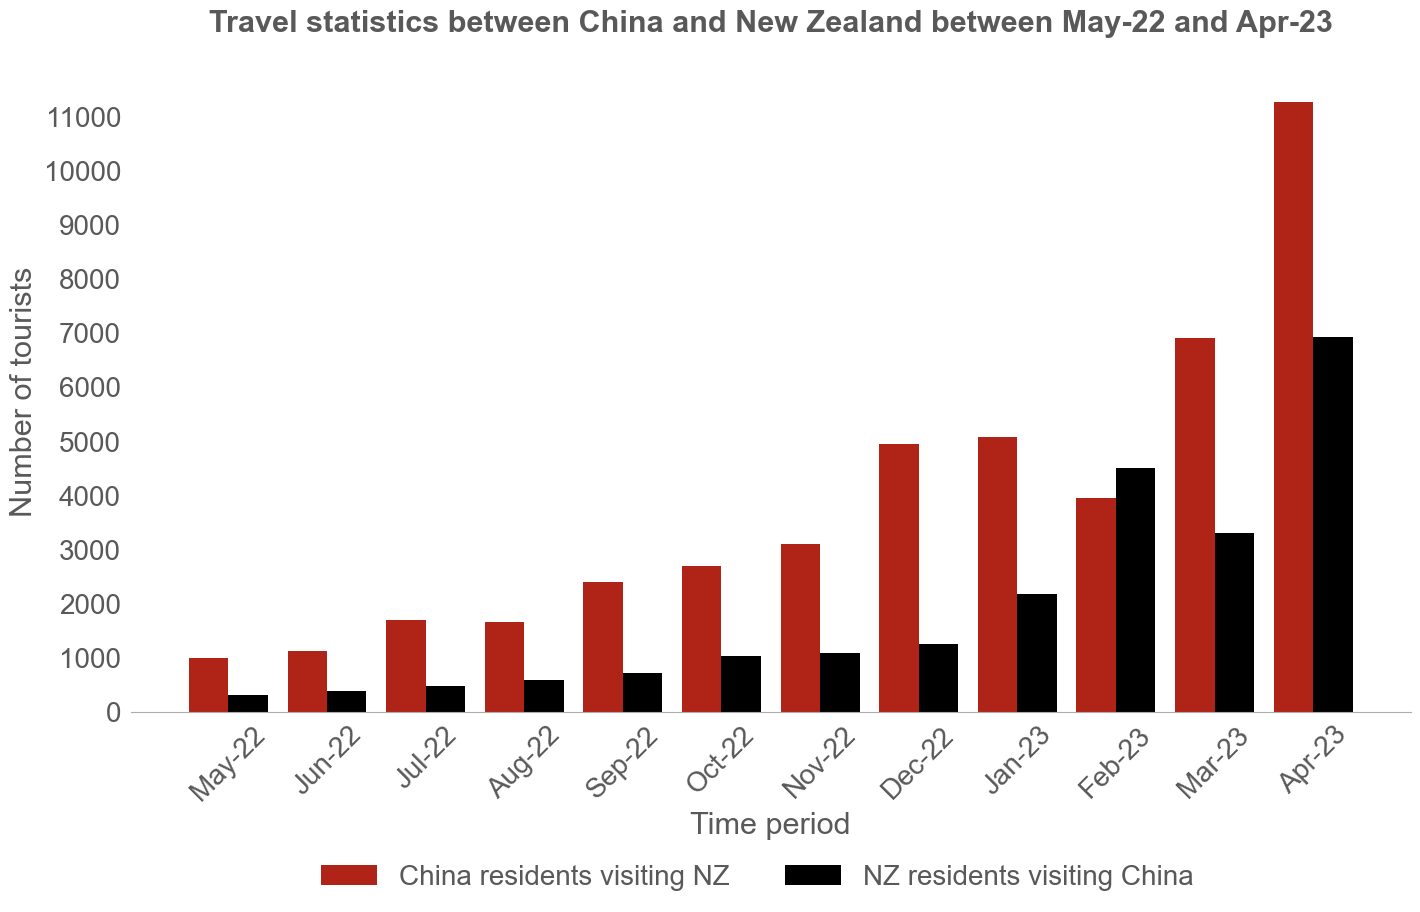

In [15]:
# Draw the grouped bar chart
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8)) 
# Add an axes to the figure for the grouped bar chart  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])   
# Set title for the plot  
ax.set_title('Travel statistics between China and New Zealand between May-22 and Apr-23', fontsize=22, color='#595959', weight='bold', y=1.05)
# Set title for axes
ax.set_xlabel('Time period', size=22, color='#595959') 
ax.set_ylabel('Number of tourists', size=22, color='#595959') 

# Plot the grouped bar chart using ax  
plot_stacked_bar_chart(ax, x, y1, y2, separate=True, label_list=[0, 1000,2000,3000, 4000,5000, 6000,7000, 8000,9000, 10000, 11000], bbox_place=(0.85, -0.2))    

plt.show()

#### **3.6. Step 6: Redundant y-axis & Cognitive tunnel.**
Problem 6: Erase redundant data-ink.  

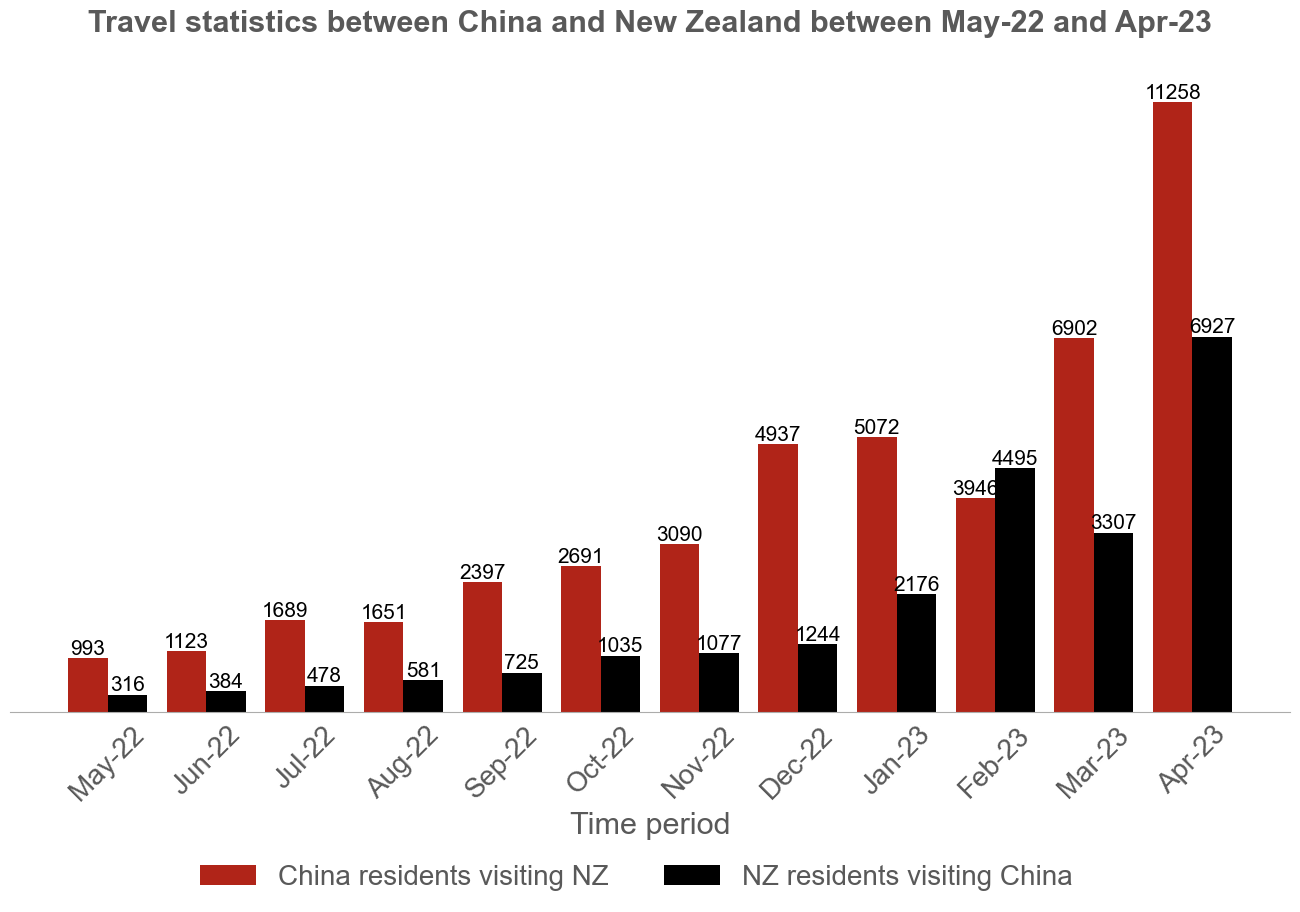

In [16]:
# Draw the grouped bar chart
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8)) 
# Add an axes to the figure for the grouped bar chart  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])   
# Set title for the plot  
ax.set_title('Travel statistics between China and New Zealand between May-22 and Apr-23', fontsize=22, color='#595959', weight='bold', y=1.05)
# Set title for axes
ax.set_xlabel('Time period', size=22, color='#595959') 

# Plot the grouped bar chart using ax
plot_stacked_bar_chart(ax, x, y1, y2, separate=True, add_data=True, label_list=[0, 1000,2000,3000, 4000,5000, 6000,7000, 8000,9000, 10000], bbox_place=(0.85, -0.2))

plt.show()

#### **3.7. Step7: Adjust the spacing.**
Problem 7: Rotated labels.

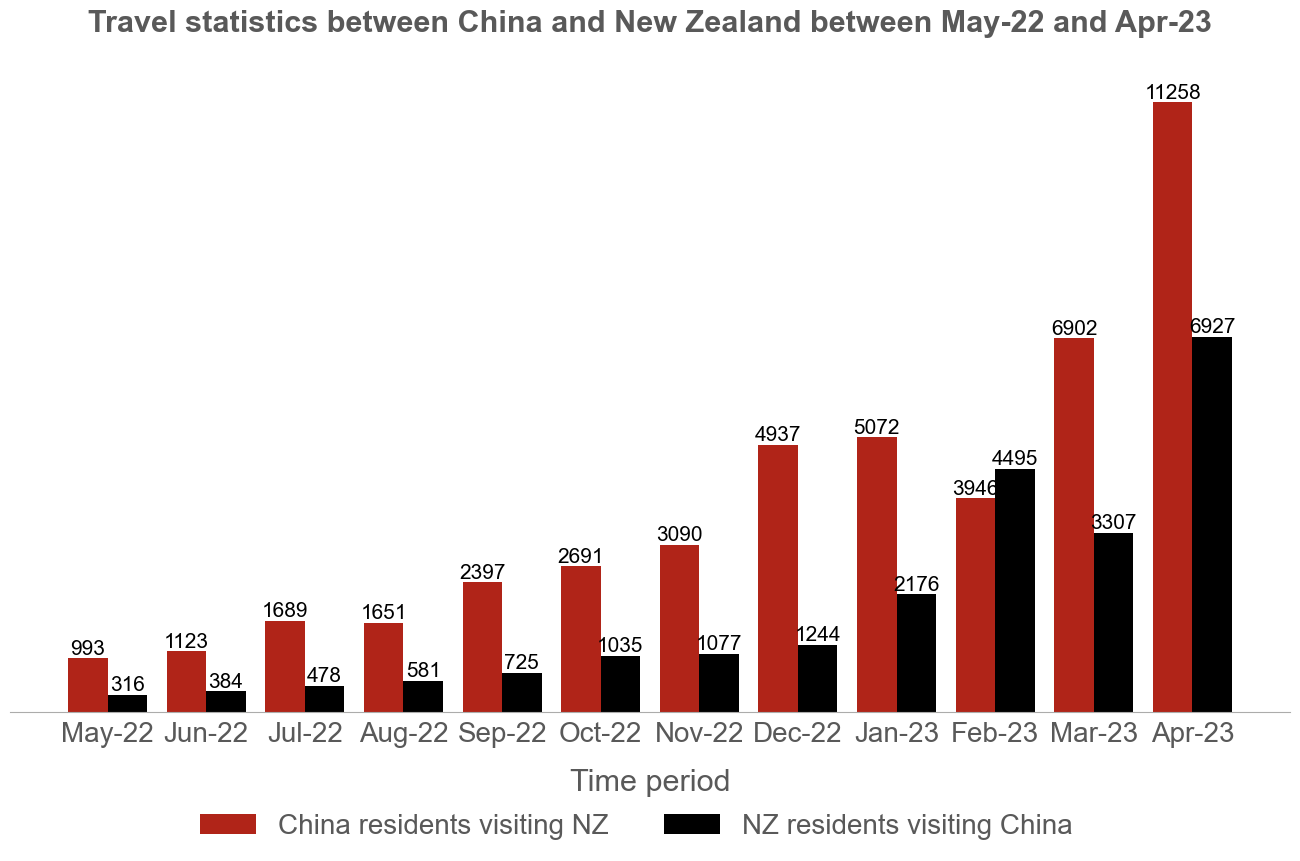

In [17]:
# Draw the grouped bar chart
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8)) 
# Add an axes to the figure for the grouped bar chart  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])   
# Set title for the plot  
ax.set_title('Travel statistics between China and New Zealand between May-22 and Apr-23', fontsize=22, color='#595959', weight='bold', y=1.05)
# Set title for axes
ax.set_xlabel('Time period', size=22, color='#595959', labelpad=15) 

# Plot the grouped bar chart using ax 
plot_stacked_bar_chart(ax, x, y1, y2, separate=True, add_data=True, label_list=[0, 1000,2000,3000, 4000,5000, 6000,7000, 8000,9000, 10000], rotation_value=0, label_size=20, bbox_place=(0.85, -0.12))    

plt.show()

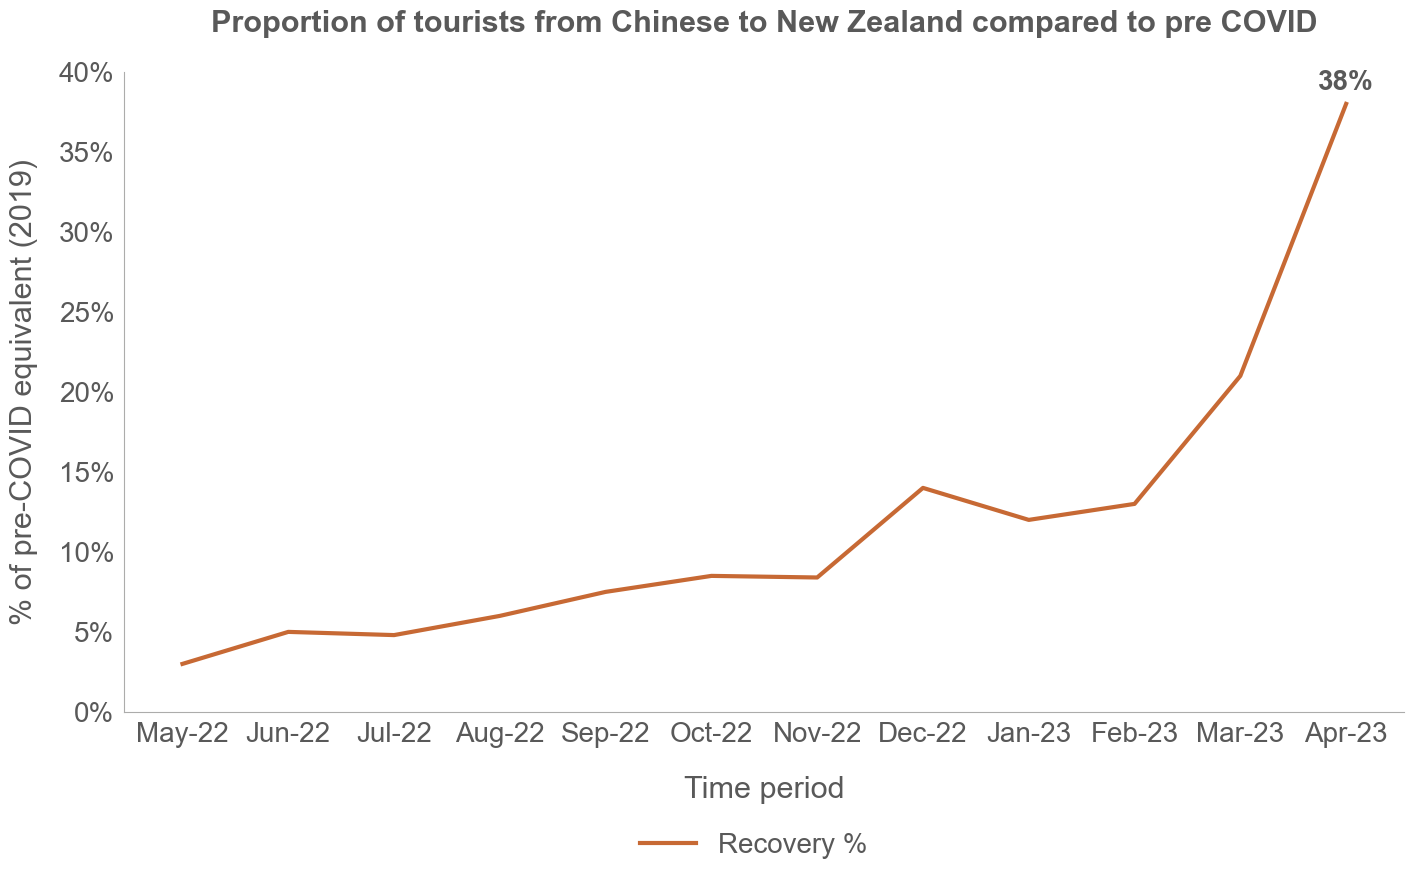

In [18]:
# Draw the line chart
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8)) 
# Add an axes to the figure for the line chart  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])   
# Set title for the plot  
ax.set_title('Proportion of tourists from Chinese to New Zealand compared to pre COVID', fontsize=22, color='#595959', weight='bold', y=1.05)
# Set title for axes
ax.set_xlabel('Time period', size=22, color='#595959', labelpad=20) 
ax.set_ylabel('% of pre-COVID equivalent (2019)', size=22, color='#595959', labelpad=15)

# Plot the line chart using ax  
plot_line_chart(ax, x, line_data, rotation_value=0, label_size=20, bbox_place=(0.6, -0.15), left_spines=True)

plt.show()


#### **3.8. Step8: Modify the image color.**
Problem 8: Meaningless color gradient. 

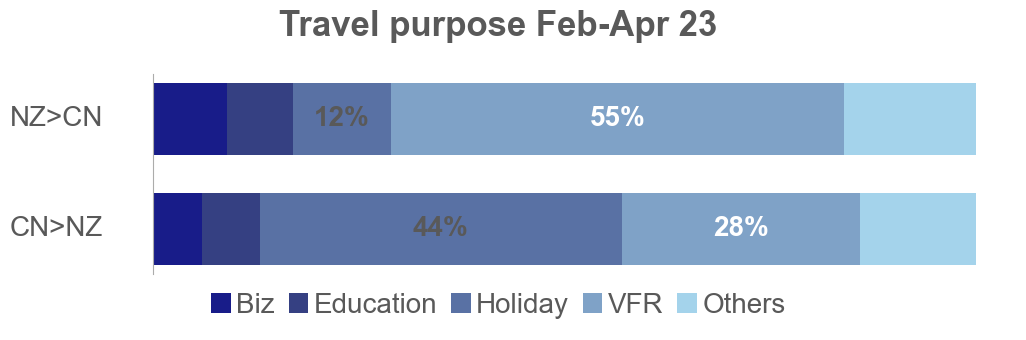

In [19]:
# Modify color
color_list = ['#181c89', '#354082', '#5971a4', '#7fa2c7', '#a4d3eb'] 

# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8))   
# Add another axes to the figure for the percentage stacked bar chart  
ax = fig.add_axes([0.22, 0.62, 0.54, 0.25]) 
# Plot the percentage stacked bar chart using ax 
plot_stacked_percentage_chart(ax, category_data, percentage_data, color_list)

plt.show()

#### **3.9. Step9: Label each point and section with an accurate value.**
Problem 9: Unclear data values. 

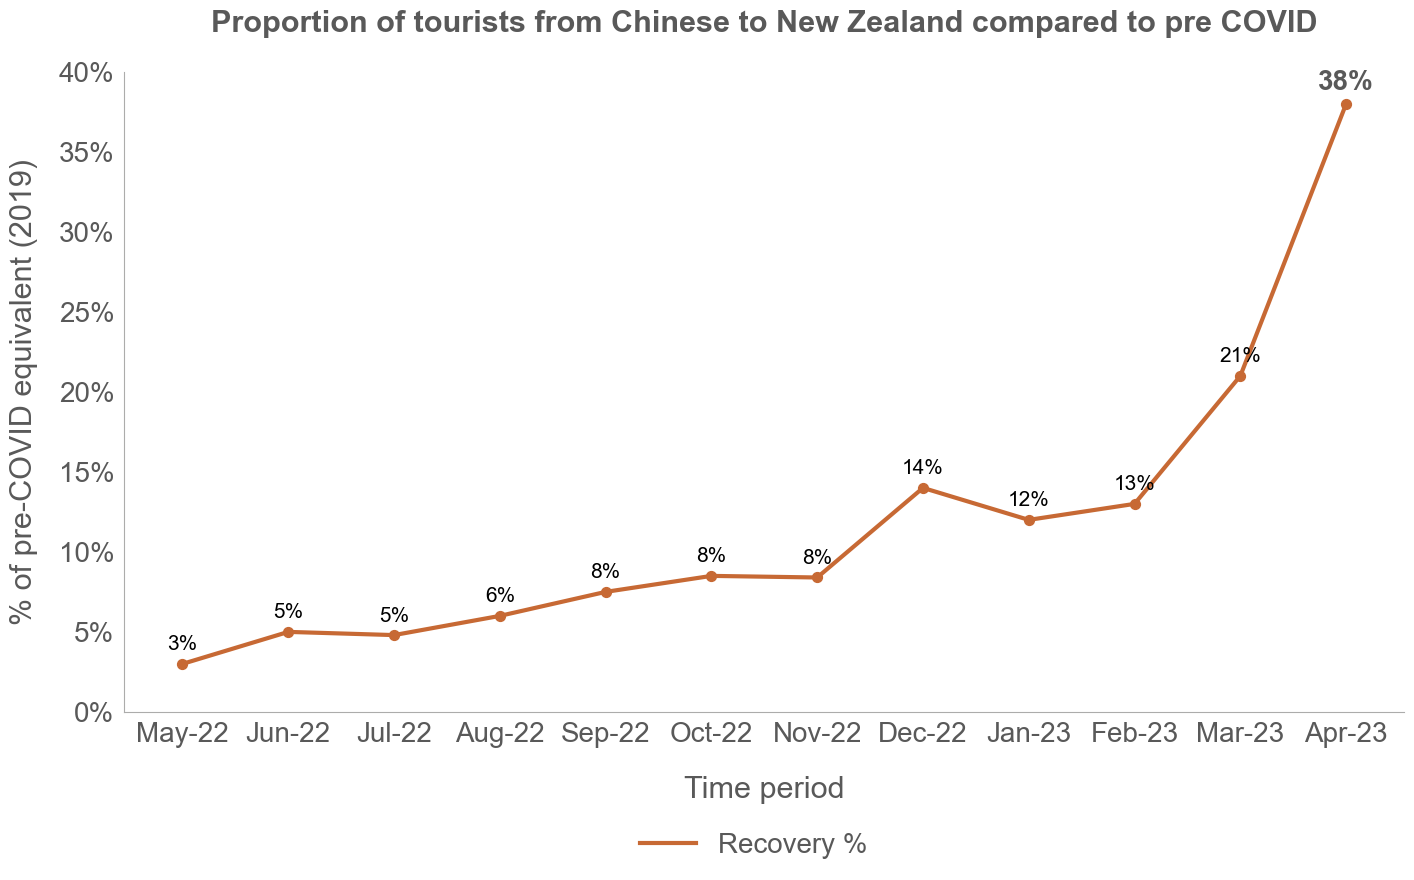

In [20]:
# Draw the line chart
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8)) 
# Add an axes to the figure for the line chart  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])   
# Set title for the plot  
ax.set_title('Proportion of tourists from Chinese to New Zealand compared to pre COVID', fontsize=22, color='#595959', weight='bold', y=1.05)
# Set title for axes
ax.set_xlabel('Time period', size=22, color='#595959', labelpad=20) 
ax.set_ylabel('% of pre-COVID equivalent (2019)', size=22, color='#595959', labelpad=15)

# Plot the line chart using ax
plot_line_chart(ax, x, line_data, rotation_value=0, scatter=True, bbox_place=(0.6, -0.15), left_spines=True)

plt.show()

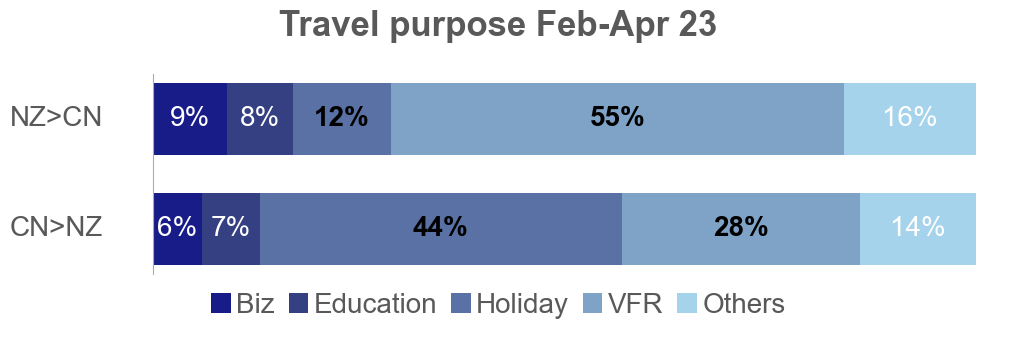

In [21]:
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8))   
# Add another axes to the figure for the percentage stacked bar chart  
ax = fig.add_axes([0.22, 0.62, 0.54, 0.25])   
# Plot the percentage stacked bar chart using ax
plot_stacked_percentage_chart(ax, category_data, percentage_data, color_list,show=True)

plt.show()

#### **3.10. Step10: Use annotations and add explanation.**
Problem 10: Lack of explanatory texts.

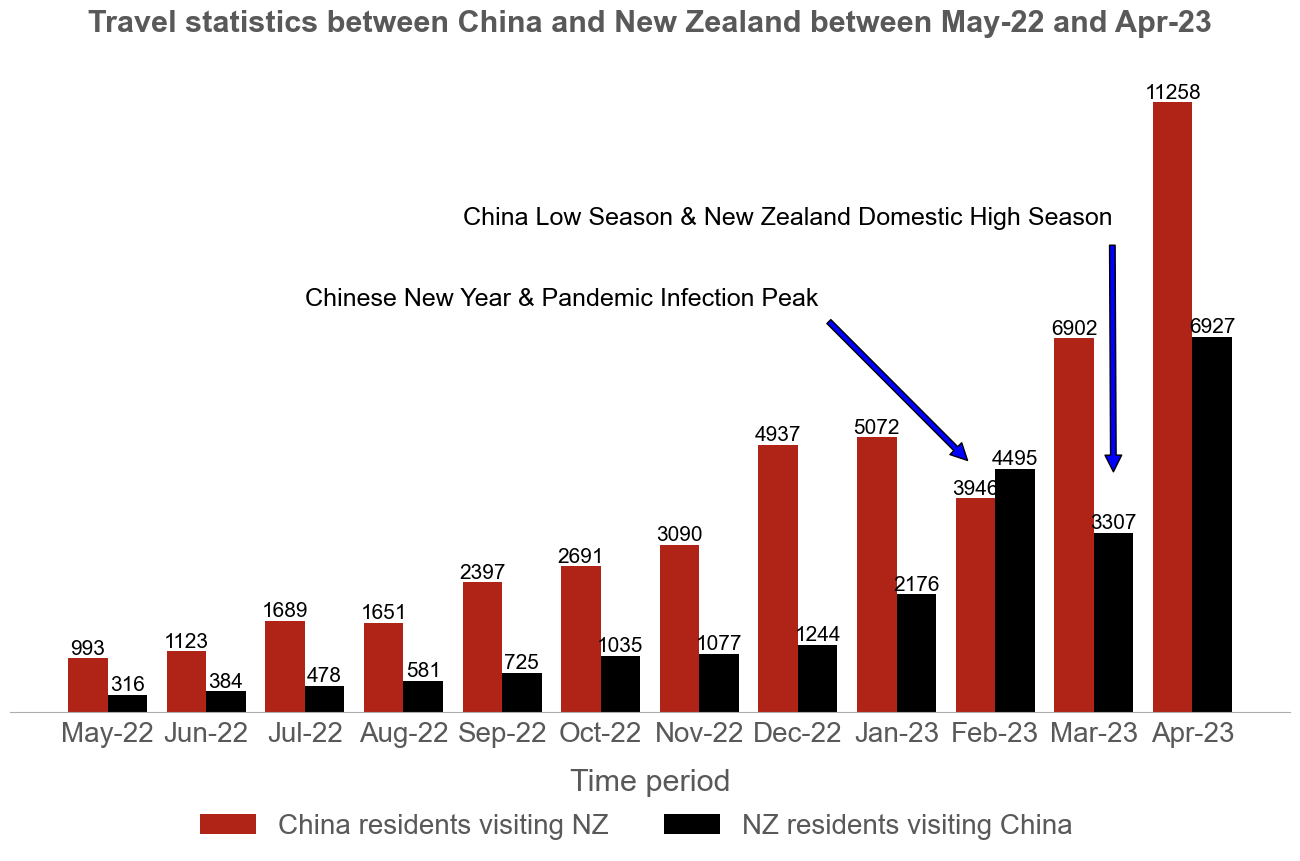

In [22]:
# Draw the grouped bar chart
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8)) 
# Add an axes to the figure for the grouped bar chart  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])   
# Set title for the plot  
ax.set_title('Travel statistics between China and New Zealand between May-22 and Apr-23', fontsize=22, color='#595959', weight='bold', y=1.05)
# Set title for axes
ax.set_xlabel('Time period', size=22, color='#595959', labelpad=15) 

# Add annotation
ax.annotate('Chinese New Year & Pandemic Infection Peak', xy=(22, 4500), xytext=(5, 7500), arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=18)
ax.annotate('China Low Season & New Zealand Domestic High Season', xy=(25.5, 4200), xytext=(9, 9000), arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=18)

# Plot the grouped bar chart using ax 
plot_stacked_bar_chart(ax, x, y1, y2, separate=True, add_data=True, label_list=[0, 1000,2000,3000, 4000,5000, 6000,7000, 8000,9000, 10000], rotation_value=0, label_size=20, bbox_place=(0.85, -0.12))    

plt.show()

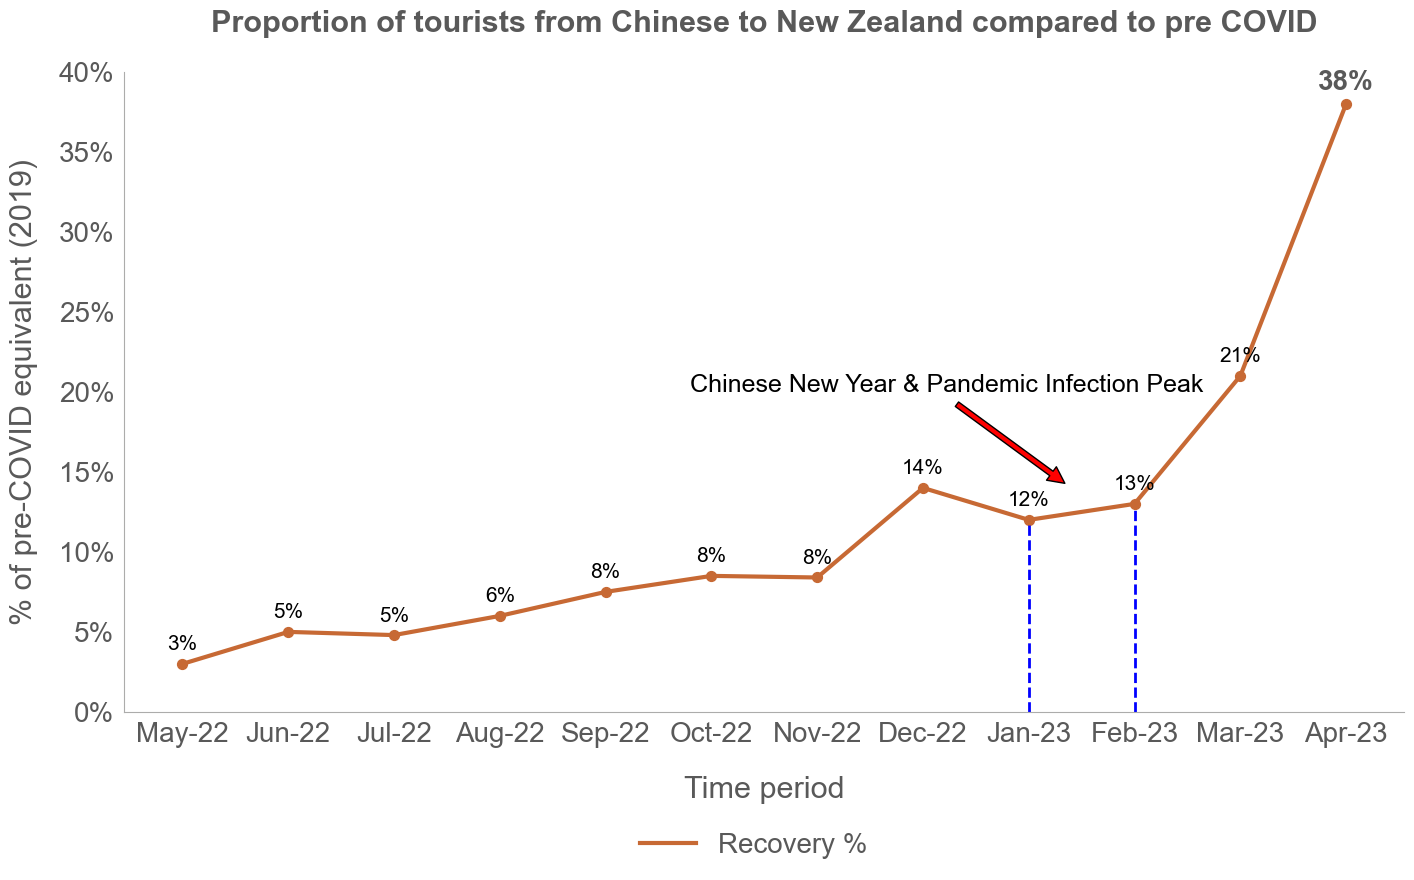

In [23]:
# Draw the line chart
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8)) 
# Add an axes to the figure for the line chart  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])   

# Set title for the plot  
ax.set_title('Proportion of tourists from Chinese to New Zealand compared to pre COVID', fontsize=22, color='#595959', weight='bold', y=1.05)
# Set title for axes
ax.set_xlabel('Time period', size=22, color='#595959', labelpad=20) 
ax.set_ylabel('% of pre-COVID equivalent (2019)', size=22, color='#595959', labelpad=15)

# Add annotation
ax.annotate('Chinese New Year & Pandemic Infection Peak', xy=(21, 0.14), xytext=(12, 0.2), arrowprops=dict(facecolor='red', shrink=0.05), fontsize=18)

# Add vertical lines
ax.axvline(x=20, color='blue', linestyle='--', linewidth=2, ymin=0, ymax=0.3)
ax.axvline(x=22.5, color='blue', linestyle='--', linewidth=2, ymin=0, ymax=0.32)

# Plot the line chart using ax
plot_line_chart(ax, x, line_data, rotation_value=0, scatter=True, bbox_place=(0.6, -0.15), left_spines=True)

plt.show()


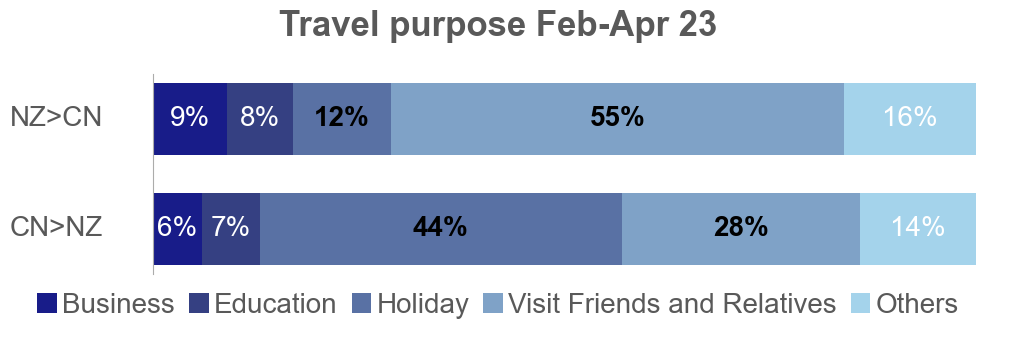

In [24]:
# Create a figure with specified size  
fig = plt.figure(figsize=(16, 8))   
# Add another axes to the figure for the percentage stacked bar chart  
ax = fig.add_axes([0.22, 0.62, 0.54, 0.25])   
# Plot the percentage stacked bar chart using ax
plot_stacked_percentage_chart(ax, category_data, percentage_data, color_list,show=True, labels=['Business', 'Education', 'Holiday', 'Visit Friends and Relatives', 'Others'])

plt.show()

### **4. Conclusion**

The above can be divided into three main parts:
1. **Function Definition:** Encapsulate all the functions needed for the project, which can be used repeatedly;
2. **Original Visualisation Replication:** Call the functions to draw the original graph;
3. **Problems and Optimisation:** For the deficiencies in the diagram, i.e. shortcomings that violate the visualization principles, targeted improvements are made step by step.

Overall, we accomplished our goal --- visualisation reproduction and improvement in a highly cohesive and concise manner. The enhanced figures show a significant improvement over the original visualizations. These graphs not only **avoid bringing too much cognitive load** to the reader, but also fulfill the requirements of the **Graphical Integrity**, which are very intuitive and easy to understand.

All of us got a lot out from this project, thanks!